In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/gym_members_exercise_tracking.csv')

In [5]:
# Display the first few rows to understand the data
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
# Check for data types and null values
print("\nData Information:")
data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  

In [7]:

# Data Cleaning
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [8]:
# Check for duplicates and remove them
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()



Number of Duplicate Rows: 0


In [10]:
# Set up the visual style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

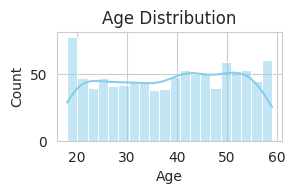

In [11]:
# 1. Distribution of Age
plt.subplot(3, 2, 1)
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

<ipython-input-12-2d64d2214662>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='viridis')


Text(0.5, 1.0, 'Gender Distribution')

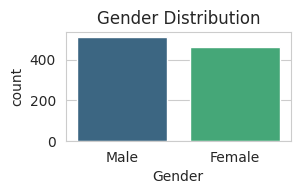

In [12]:
# 2. Distribution of Gender
plt.subplot(3, 2, 2)
sns.countplot(data=data, x='Gender', palette='viridis')
plt.title('Gender Distribution')

<ipython-input-13-ad402d42b4e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Workout_Type', order=data['Workout_Type'].value_counts().index, palette='mako')


Text(0.5, 1.0, 'Workout Type Frequency')

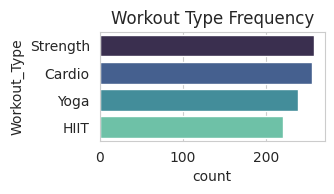

In [13]:
# 3. Distribution of Workout Type
plt.subplot(3, 2, 3)
sns.countplot(data=data, y='Workout_Type', order=data['Workout_Type'].value_counts().index, palette='mako')
plt.title('Workout Type Frequency')

Text(0.5, 1.0, 'Height vs. Weight by Gender')

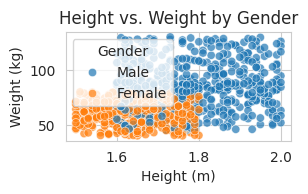

In [14]:
# 4. Scatter plot of Weight vs Height
plt.subplot(3, 2, 4)
sns.scatterplot(data=data, x='Height (m)', y='Weight (kg)', hue='Gender', alpha=0.7)
plt.title('Height vs. Weight by Gender')


Text(0.5, 1.0, 'Calories Burned vs. Session Duration by Workout Type')

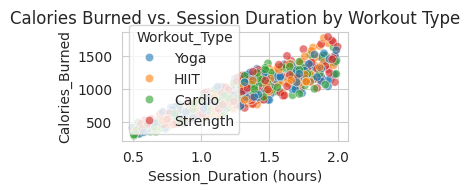

In [16]:
# 5. Calories Burned vs. Session Duration
plt.subplot(3, 2, 5)
sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', alpha=0.6)
plt.title('Calories Burned vs. Session Duration by Workout Type')



<ipython-input-20-4c49c4faa7e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='BMI', palette='pastel')


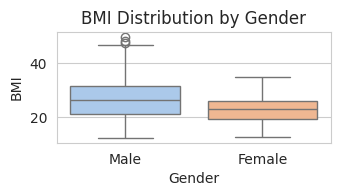

In [20]:
# 6. Box plot of BMI by Gender
plt.subplot(3, 2, 6)
sns.boxplot(data=data, x='Gender', y='BMI', palette='pastel')
plt.title('BMI Distribution by Gender')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

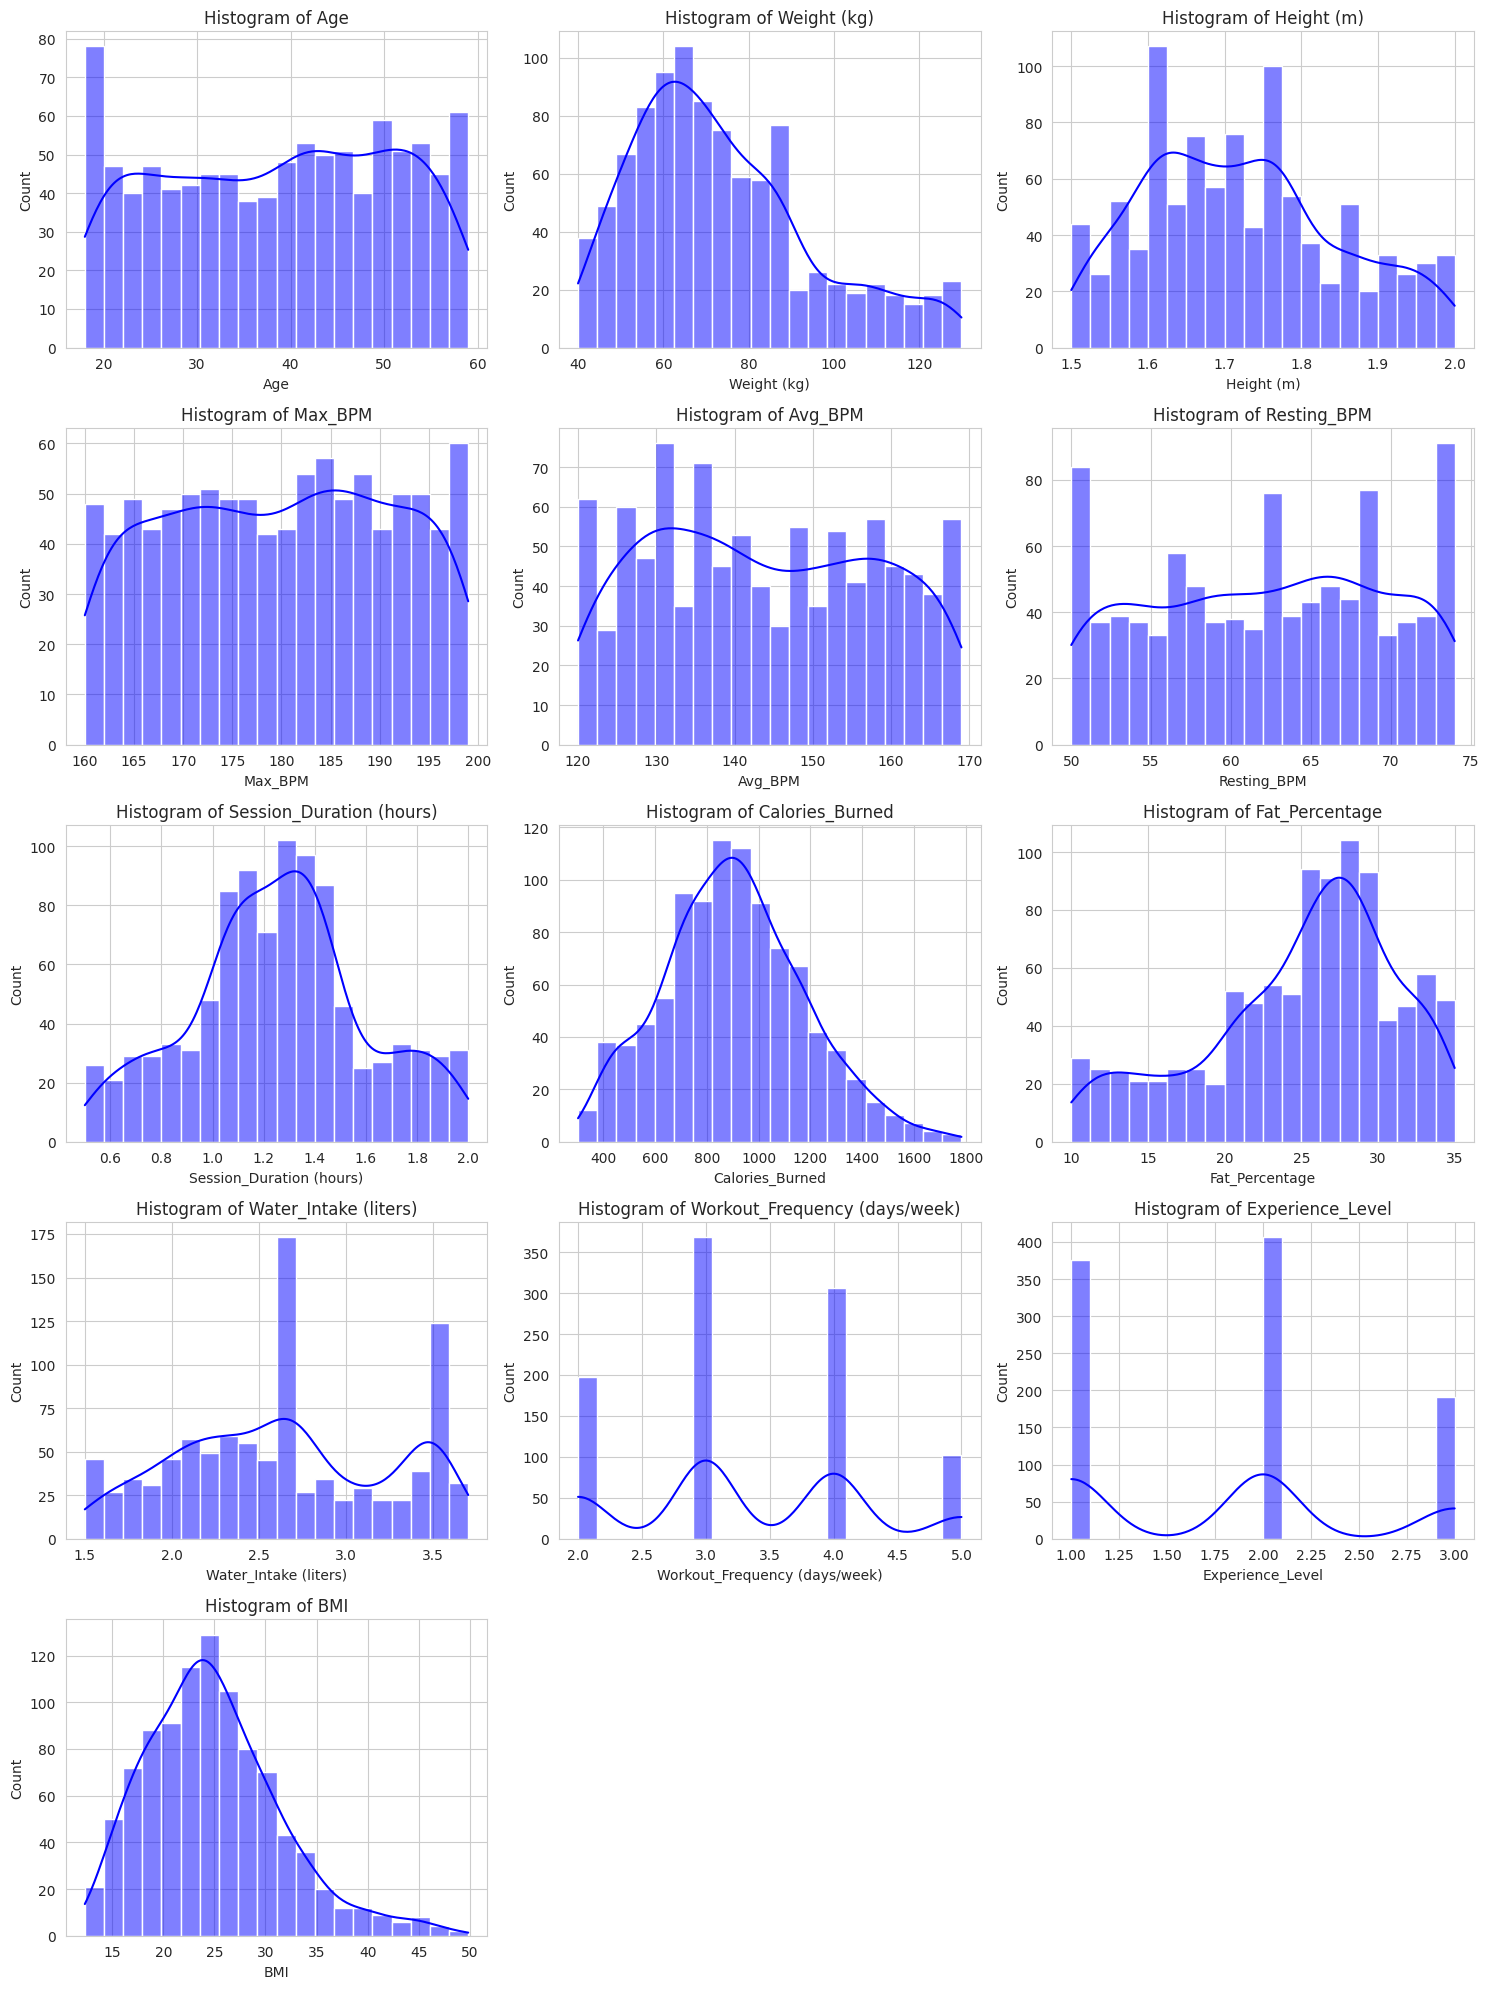

In [22]:
# Get all numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(15, 4 * n_rows))  # Adjust figure height based on number of rows
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


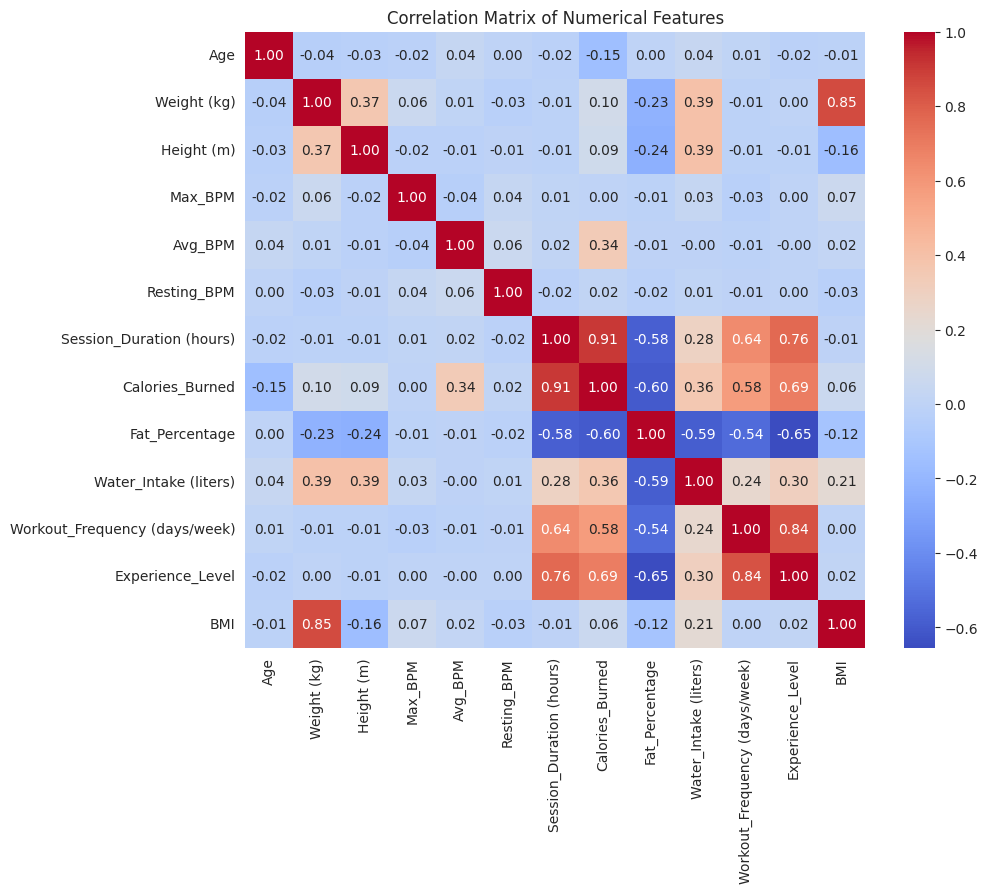

In [24]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Create the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
